#Exploratory Data Analysis

##Purpose
This notebook explores the Wisconsin Breast Cancer Dataset to understand feature distributions, class balance,correlations and predictive potential using statistical plots and dimentionality reduction before modeling.


 I focused on the top 5 features most correlated with diagnosis for clean, interpretable visualizations.

##Setup & import libaries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install umap-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set(style="whitegrid")

##Load Dataset from Drive

####  Description
This dataset contains measurements of breast tumors, labeled as benign (B) or malignant (M). Each sample includes features like radius, texture, perimeter, area, and concavity.

Key objectives




- Explore class distribution
- Identify top predictive features
- Visualize feature distributions
- Assess class separability using PCA, t-SNE, and UMAP

In [6]:
# Load cleaned dataset from Drive
data_path = "/content/drive/My Drive/Portfolio/DataSciencePortfolio/Projects/Breast-Cancer/data/raw/Breast_cancer_dataset.csv"
df = pd.read_csv(data_path)

# Preview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Inspect Structure

In [8]:
# Dataset overview
df.info()

df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


##Class Distribution


#### Plot: Count of Benign vs Malignant Tumors
This plot shows the number of samples in each class and the proportion of benign *vs* malignant tumors to assess class balance



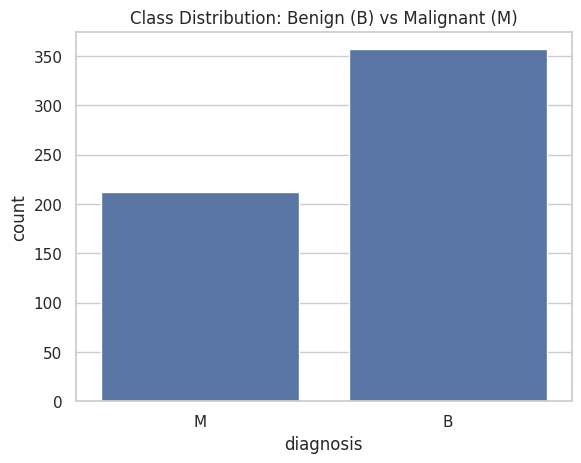

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [9]:
# Diagnosis counts
sns.countplot(x="diagnosis", data=df)
plt.title("Class Distribution: Benign (B) vs Malignant (M)")
plt.show()

# Percentage breakdown
print(df["diagnosis"].value_counts(normalize=True) * 100)

###Observation

The dataset shows a slight imbalance: **63% benign** vs. **37% malignant** cases.  
This imbalance may bias models toward the majority class (benign), leading to misleading accuracy scores.  

To address this, I will:
- Use **stratified sampling** during train-test splits to preserve class proportions.  
- Evaluate models with **balanced metrics** such as precision, recall, F1-score, and ROC-AUC, rather than relying solely on accuracy.  
- Consider techniques like class weighting or resampling if needed during model training.

##Correlation Analysis


###Correlation Analysis of All Features

####Plot: Full Feature Correlation Heatmap
This heatmap shows pairwise correlations between all features and the target (`diagnosis`). Strong correlations with `diagnosis` indicate predictive potential. High correlations between features may signal multicollinearity.

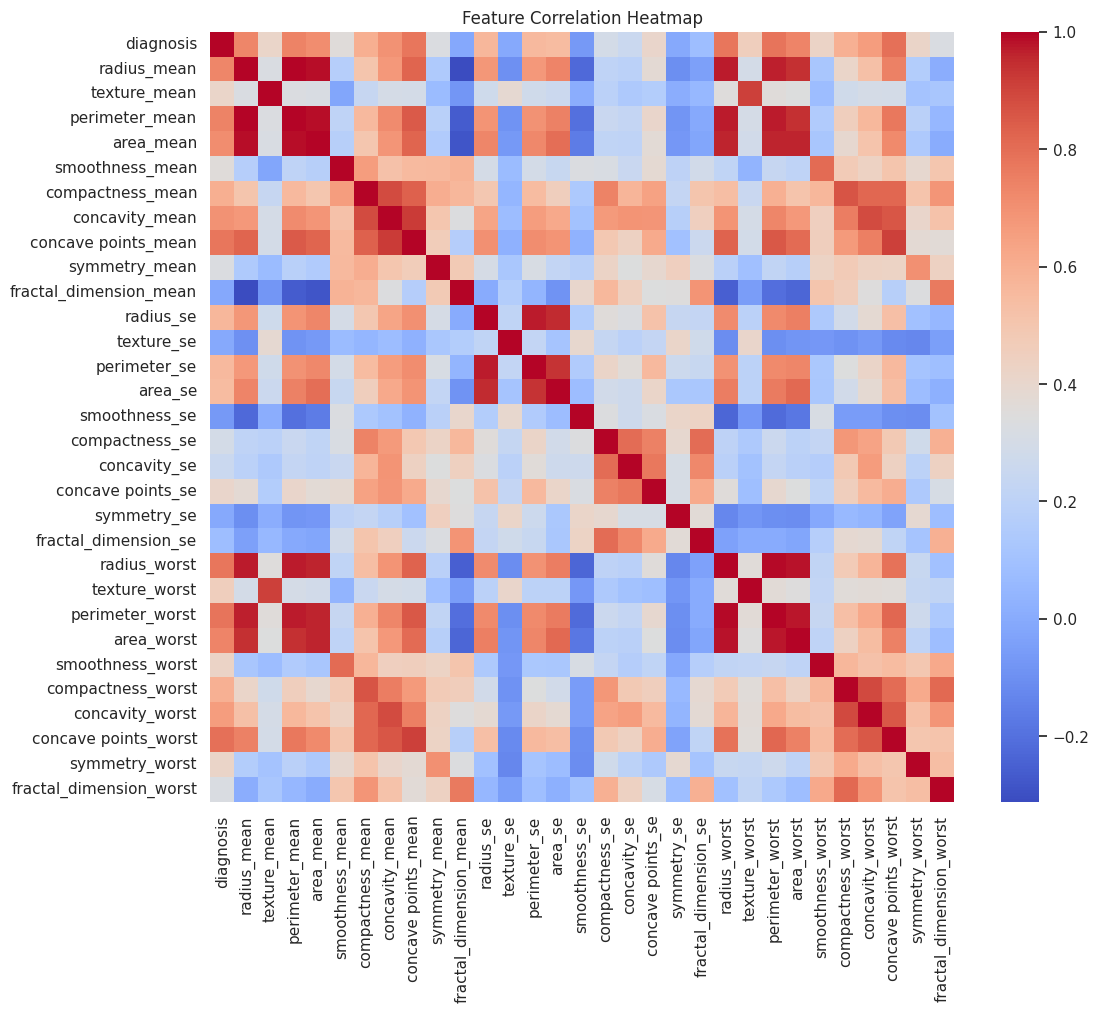

In [10]:
# Encode diagnosis for correlation
df_corr = df.copy()
df_corr = df_corr.drop(columns=["id", "Unnamed: 32"])
df_corr["diagnosis"] = df_corr["diagnosis"].map({"M": 1, "B": 0})

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

###Pearson Correlation
Sort features in descending order based on Correlation with Diagnosis

To keep visualizations clean and interpretable,I will focus on the top 5 features for EDA plots. These features show the strongest linear relationship with diagnosis and are ideal for comparing distributions across classes.



In [11]:
# Encode diagnosis for correlation
df_corr = df.copy()
df_corr["diagnosis"] = df_corr["diagnosis"].map({"M": 1, "B": 0})

# Compute correlations with diagnosis
correlations = df_corr.corr()["diagnosis"].drop(["diagnosis", "id", "Unnamed: 32"])

# Arrange all 30 features from highest to lowest correlation
sorted_features = correlations.abs().sort_values(ascending=False)
print("All features sorted by correlation:\n", sorted_features)

# Select top 5 features for visualization
top5_features = sorted_features.head(5).index.tolist()
print("Top 5 features for EDA:", top5_features)

All features sorted by correlation:
 concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              

###Correlation Analysis of Top 5 Features



The plot highlights the pairwise correlations among the five most predictive features.  
Strong positive correlations indicate redundancy, while weaker or negative correlations suggest complementary information.  
This analysis helps identify multicollinearity risks and guides feature selection for modeling.
  
Overall, the top features show meaningful relationships with the diagnosis variable, reinforcing their importance in classification.

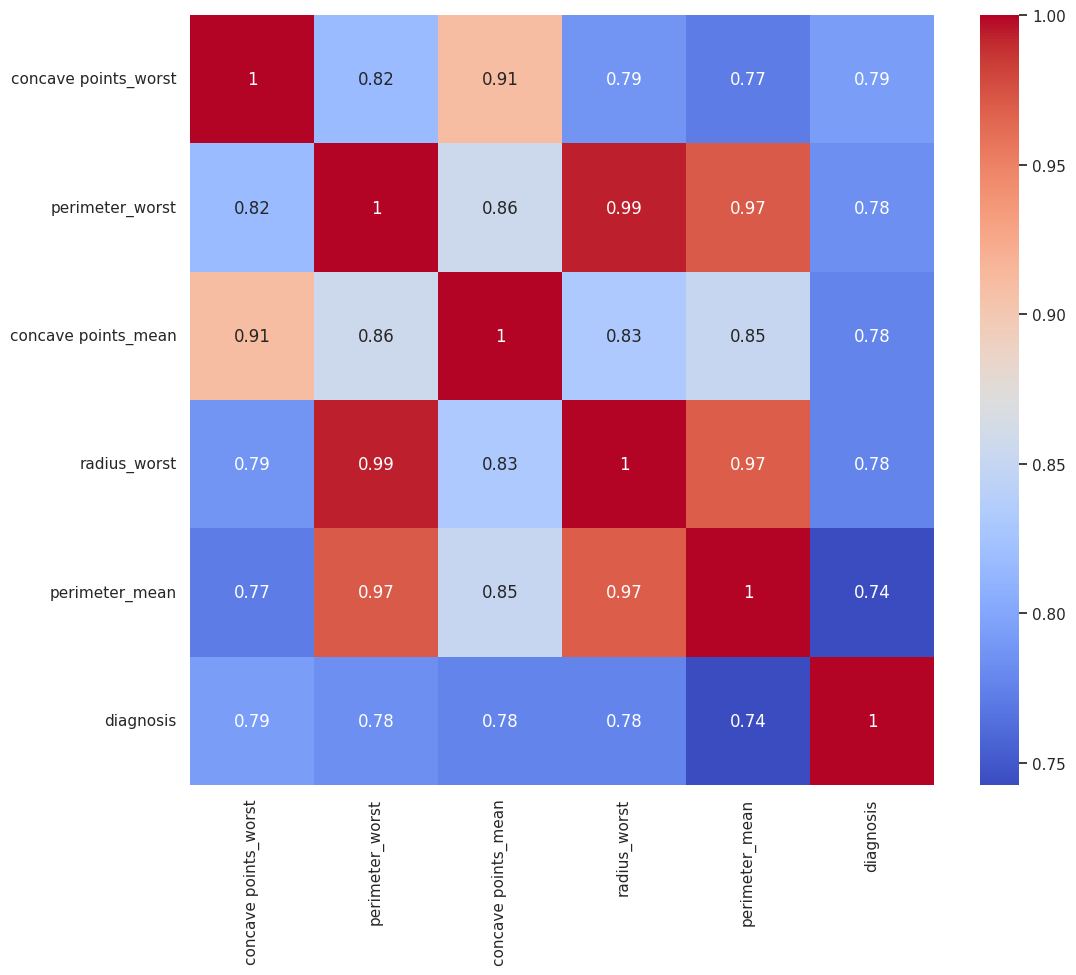

In [12]:
# Compute correlation with diagnosis
correlations = df_corr.corr()["diagnosis"].drop("diagnosis").sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr[top5_features + ["diagnosis"]].corr(), cmap="coolwarm", annot=True)
plt.show()

##Feature Distributions of Top 5 Features

###Histplots with KDE

#####  Plot: Raw Feature Distribution
These plots show the frequency and shape of each feature across all samples, without separating by diagnosis. This is helpful for understanding spread, skewness, and modality.


Features like `concave points_mean` and `radius_worst` exhibit right-skewed distributions, suggesting most tumors have lower values with a long tail toward malignancy.

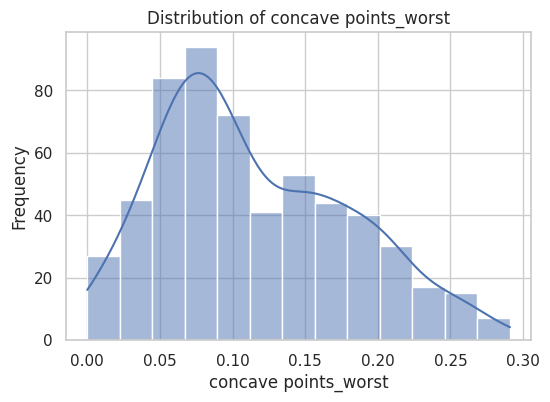

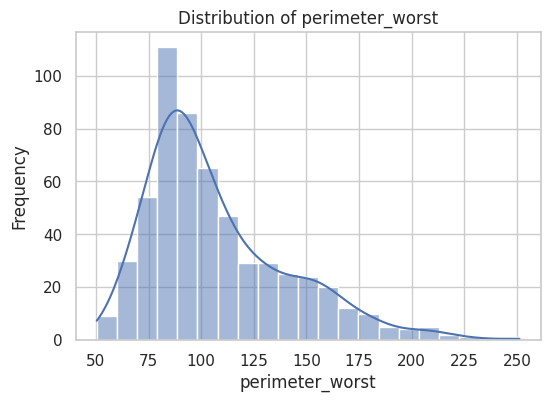

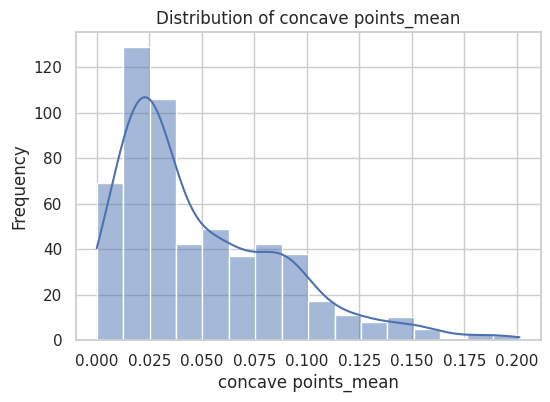

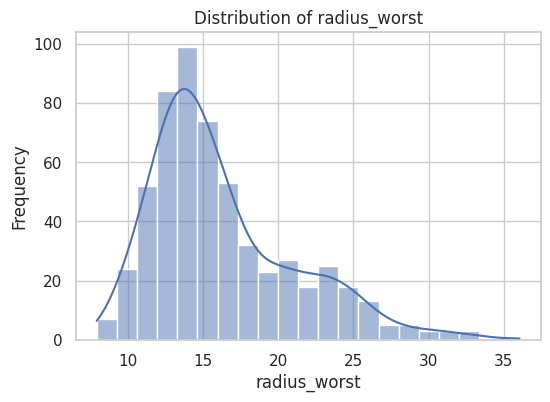

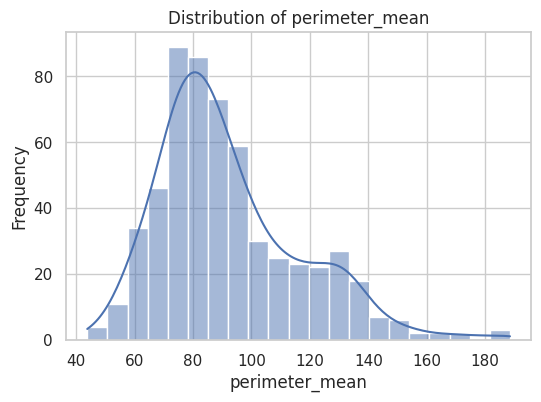

In [13]:
for feature in top5_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

###Feature Distributions by Diagnosis(Box plots)

#### Plot: Feature Distribution by Diagnosis
Boxplots show how each top feature varies between benign and malignant tumors. Clear separation in medians and interquartile ranges suggests strong predictive power.

Boxplots reveal median values, interquartile ranges, and outliers. Features like `concave points_worst` and `perimeter_worst` show clear separation between benign and malignant tumors, with malignant samples skewed toward higher values.

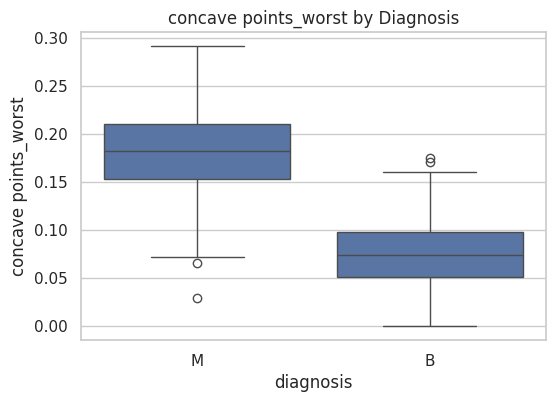

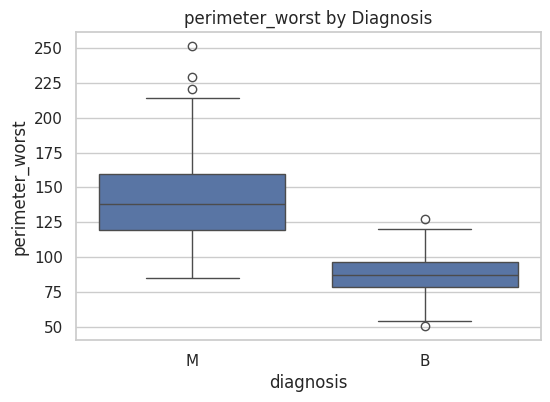

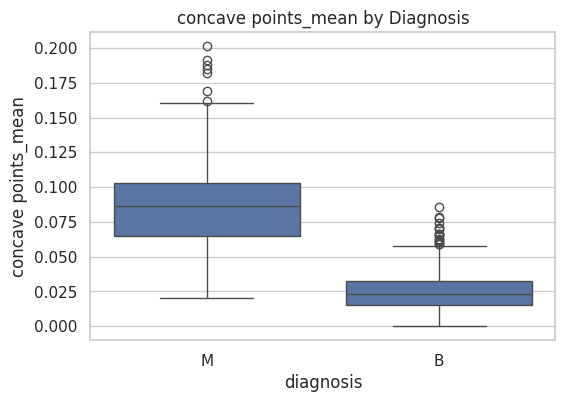

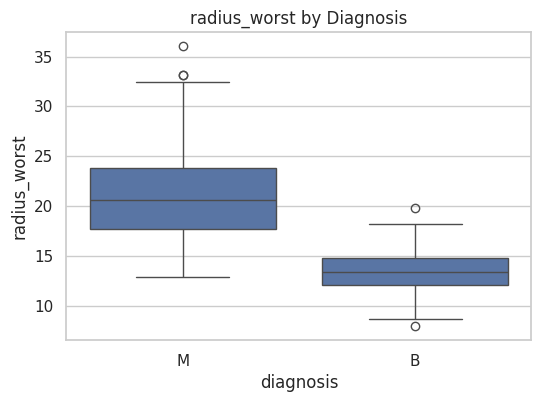

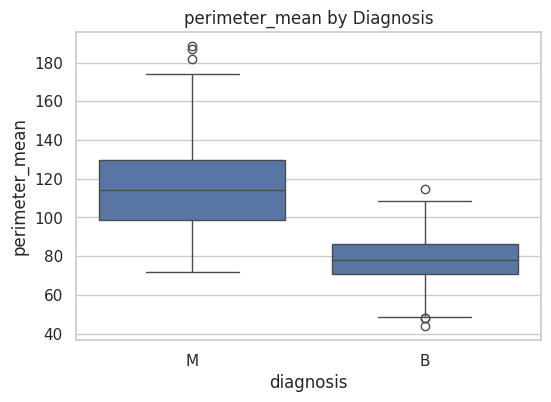

In [14]:
# Boxplots for top features
for feature in top5_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="diagnosis", y=feature, data=df)
    plt.title(f"{feature} by Diagnosis")
    plt.show()

In [16]:
high_outliers = df[df["concave points_mean"] > df["concave points_mean"].quantile(0.95)]
high_outliers["diagnosis"].value_counts()

,count
diagnosis,
M,29


###Feature Distributions by Diagnosis(Violin plots)

#### Plot: Feature Distribution Shape by Diagnosis
Violin plots combine boxplot statistics with KDE curves to show the full distribution shape. Useful for spotting skewness or bimodal patterns.

Wider violins indicate higher density. Malignant tumors tend to have broader, right-skewed distributions across key features.

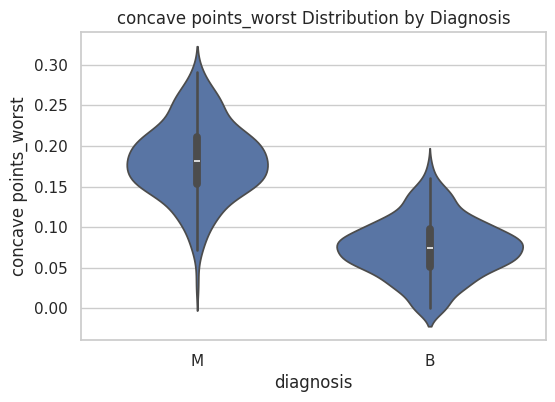

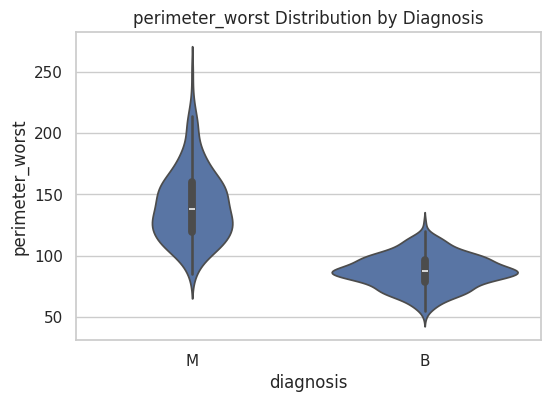

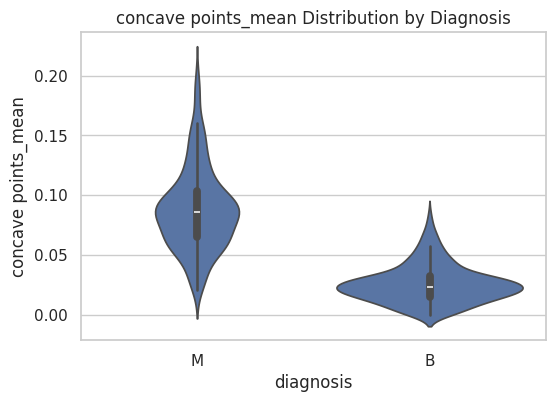

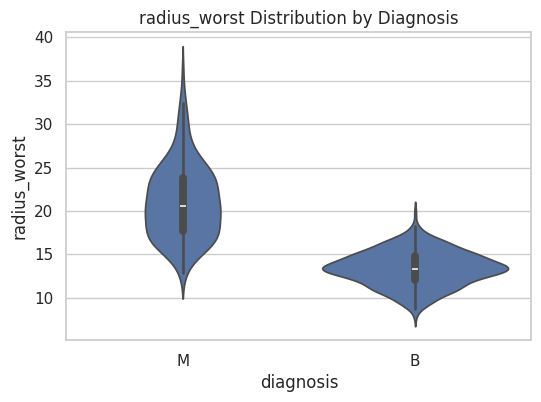

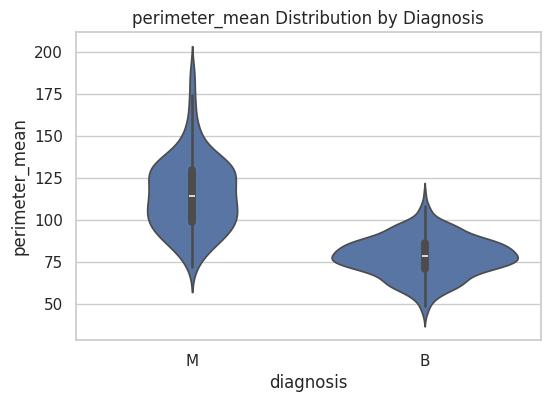

In [ ]:
for feature in top5_features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x="diagnosis", y=feature, data=df)
    plt.title(f"{feature} Distribution by Diagnosis")
    plt.show()

##Feature Relationships


####  Scatterplots of Predictive Pairs
Scatterplots reveal how two features interact across classes. For example, `radius_mean` and `area_mean` show a strong positive correlation, with malignant tumors clustering in the upper-right quadrant. These plots help identify class separation and overlapping zones.

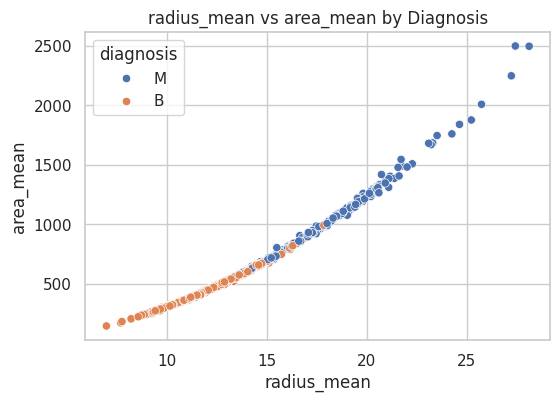

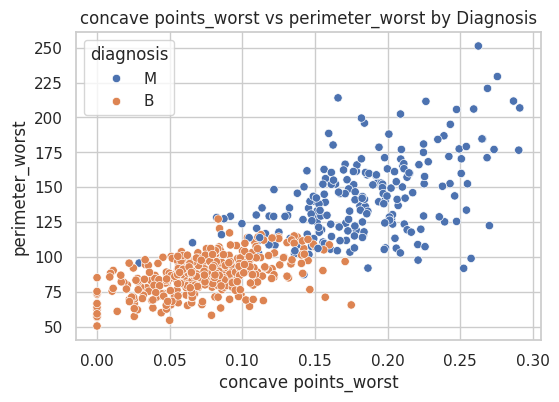

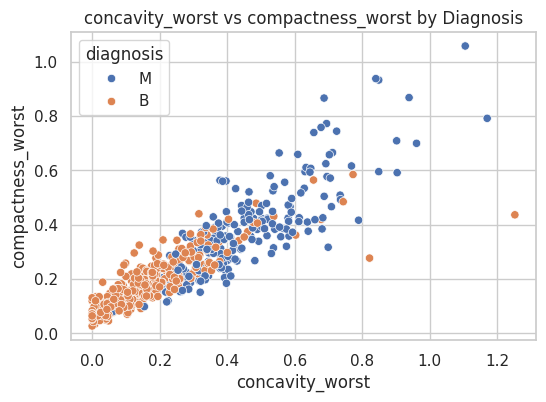

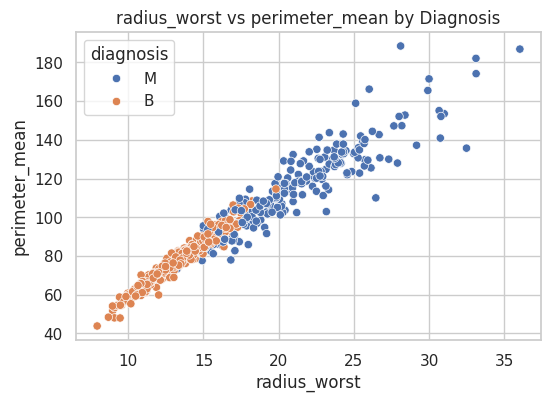

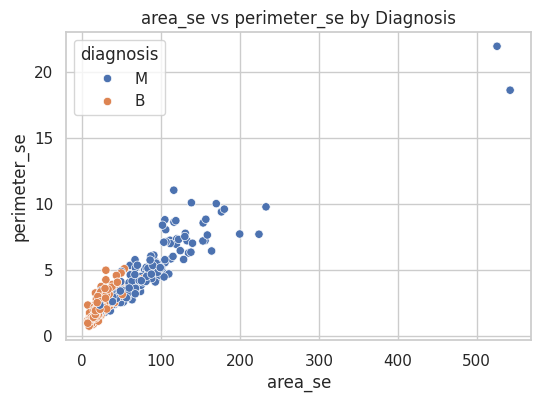

In [ ]:
feature_pairs = [
    ("radius_mean", "area_mean"),
    ("concave points_worst", "perimeter_worst"),
    ("concavity_worst", "compactness_worst"),
    ("radius_worst", "perimeter_mean"),
    ("area_se", "perimeter_se")
]

for x, y in feature_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, hue="diagnosis", data=df)
    plt.title(f"{x} vs {y} by Diagnosis")
    plt.show()

##Dimentionality reduction


I applied PCA, t-SNE, and UMAP to visualize tumor features in 2D space. After scaling, all three methods revealed clear separation between benign and malignant tumors:

PCA shows global variance and linear separability.
t-SNE highlights tight local clusters.
UMAP balances global structure with local detail.
These plots confirm that the selected features are informative and separable which offers a strong foundation for modeling.


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


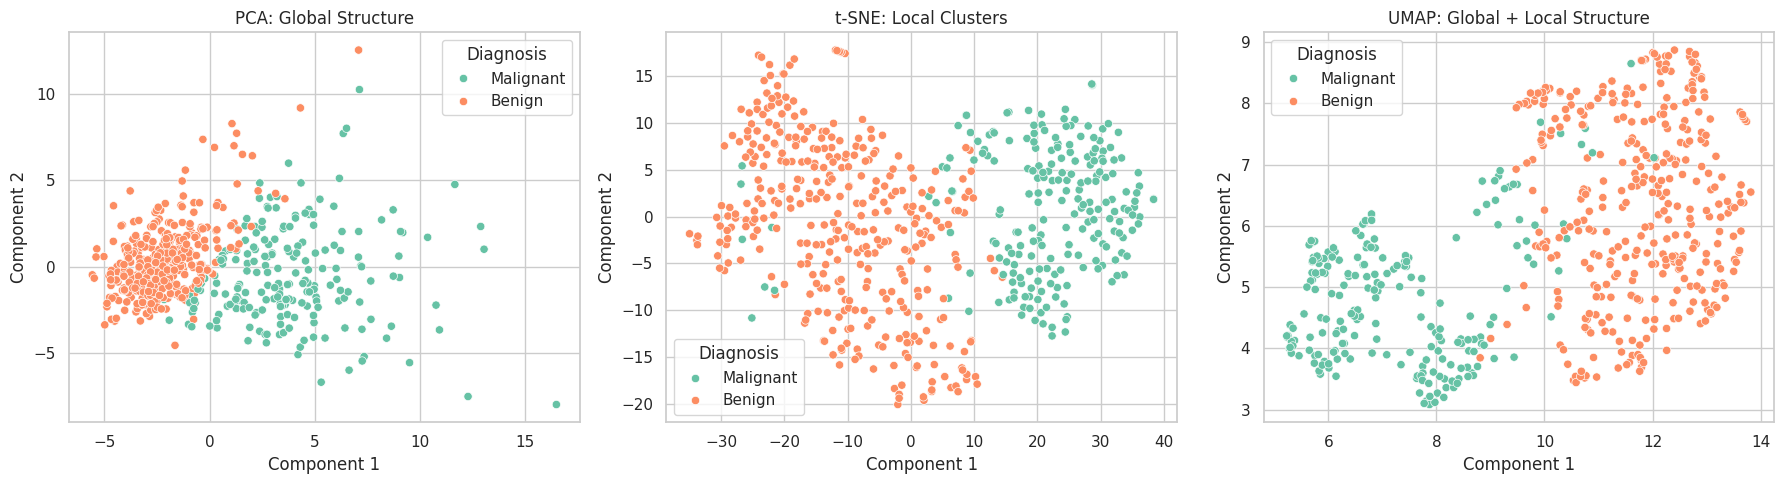

In [ ]:
X = df.drop(["diagnosis", "Unnamed: 32"], axis=1)
y = df["diagnosis"].map({"M": 1, "B": 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def plot_dimensionality_reduction(X_scaled, y, label_map={0: "Benign", 1: "Malignant"}, random_state=42):


    # Map labels to class names
    y_named = pd.Series(y).map(label_map)

    # Run PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plot_df_pca = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
    plot_df_pca['Diagnosis'] = y_named

    # Run t-SNE
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=30)
    X_tsne = tsne.fit_transform(X_scaled)
    plot_df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
    plot_df_tsne['Diagnosis'] = y_named

    # Run UMAP
    reducer = umap.UMAP(n_components=2, random_state=random_state)
    X_umap = reducer.fit_transform(X_scaled)
    plot_df_umap = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
    plot_df_umap['Diagnosis'] = y_named

    # Plot side-by-side
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(x='Component 1', y='Component 2', hue='Diagnosis', data=plot_df_pca, ax=axes[0], palette="Set2")
    axes[0].set_title("PCA: Global Structure")

    sns.scatterplot(x='Component 1', y='Component 2', hue='Diagnosis', data=plot_df_tsne, ax=axes[1], palette="Set2")
    axes[1].set_title("t-SNE: Local Clusters")

    sns.scatterplot(x='Component 1', y='Component 2', hue='Diagnosis', data=plot_df_umap, ax=axes[2], palette="Set2")
    axes[2].set_title("UMAP: Global + Local Structure")

    for ax in axes:
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
        ax.legend(title="Diagnosis")

    plt.tight_layout()
    plt.show()

plot_dimensionality_reduction(X_scaled, y)

## Insights
- Several features show strong separation between benign and malignant tumors.
- Dimensionality reduction confirms class separability.

## Next Steps
- Handle multicollinearity in `Brest-Cancer-03_preprocessing.ipynb` using VIF
- Train models and extract feature importance in `Breast-Cancer-04_modeling.ipynb`